# TFM UOC

# Fase 1 - Analisis de datos

In [27]:
import pandas as pd # Data handling and managing
import numpy as np  # Handiling linear Algera
import seaborn as sn
import datetime 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

import pmdarima as pm

%matplotlib inline

In [28]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [80]:
dataset=pd.read_excel(r'C:\Users\subir\OneDrive\Escritorio\PC ANTIC\UOC\TFM\Dataset_Completo_Fase1.xlsx')
dataset.drop(dataset.columns[0], axis=1, inplace=True)
print(dataset)

           Fecha  Producto  udsVenta  udsStock  flag   Precio  Festivo  \
0     2019-06-05         1      2074     10184     0  4.19310        0   
1     2019-06-06         1     12787      4918     1  3.26130        0   
2     2019-06-07         1      3110      4918     0  4.19310        0   
3     2019-06-08         1         0      4918     0  4.19310        0   
4     2019-06-09         1         0      4918     0  4.19310        0   
...          ...       ...       ...       ...   ...      ...      ...   
41300 2021-03-05        99         0       346     0  4.35323        0   
41301 2021-03-06        99         0       346     0  4.35323        0   
41302 2021-03-07        99         0       346     0  4.35323        0   
41303 2021-03-08        99         0       346     0  4.35323        0   
41304 2021-03-09        99         0       540     0  4.35323        0   

       Fin de semana  
0                  0  
1                  0  
2                  0  
3                  

In [81]:

#var['Fecha']=pd.to_datetime(dataset['Fecha'])
dataset['Fecha_2']=pd.to_datetime(dataset['Fecha'])

dataset['Año']=dataset['Fecha_2'].dt.year
dataset['Mes']=dataset['Fecha_2'].dt.month
dataset['Weekday']=dataset['Fecha_2'].dt.weekday

In [82]:
dataset.head()

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
0,2019-06-05,1,2074,10184,0,4.1931,0,0,2019-06-05,2019,6,2
1,2019-06-06,1,12787,4918,1,3.2613,0,0,2019-06-06,2019,6,3
2,2019-06-07,1,3110,4918,0,4.1931,0,0,2019-06-07,2019,6,4
3,2019-06-08,1,0,4918,0,4.1931,0,1,2019-06-08,2019,6,5
4,2019-06-09,1,0,4918,0,4.1931,0,1,2019-06-09,2019,6,6


<AxesSubplot:xlabel='Fecha', ylabel='udsVenta'>

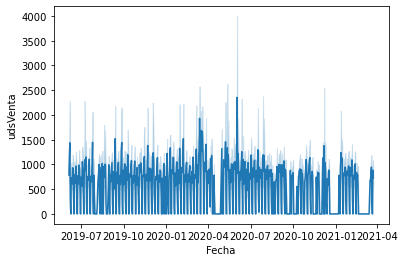

In [6]:
sns.lineplot(x="Fecha", y="udsVenta",legend = 'full' , data=dataset)

<AxesSubplot:xlabel='Año', ylabel='udsVenta'>

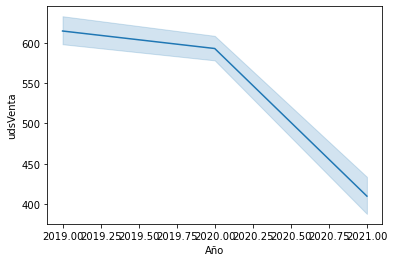

In [61]:
sns.lineplot(x="Año", y="udsVenta",legend = 'full' , data=dataset)

<AxesSubplot:xlabel='Mes', ylabel='udsVenta'>

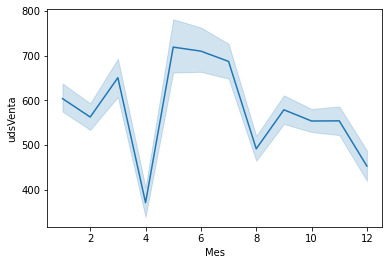

In [62]:
sns.lineplot(x="Mes", y="udsVenta",legend = 'full' , data=dataset)

<AxesSubplot:xlabel='Weekday', ylabel='udsVenta'>

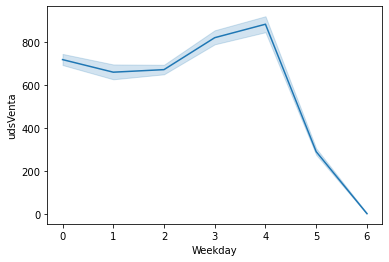

In [65]:
sns.lineplot(x="Weekday", y="udsVenta",legend = 'full' , data=dataset)

<AxesSubplot:xlabel='Weekday', ylabel='udsVenta'>

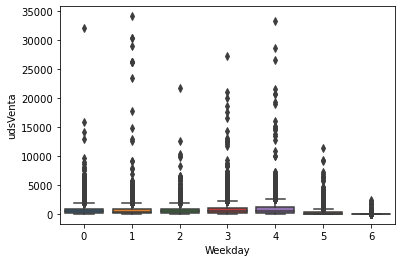

In [66]:
#Los outliers no nos permiten ver claramente la distribucion de los datos
sns.boxplot(x="Weekday", y="udsVenta", data=dataset)

Aqui vemos que hay muchos outliers a tratar

# Para tratar outliers utilizamos IQR score

Tener en cuenta que en el caso de arima es iomportante tratar los outliers ya que pueden tener un efecto negativo sobretodo si tratamos con datos referentes al pasado. Ver https://www.researchgate.net/publication/4960827_The_effect_of_additive_outliers_on_the_forecasts_from_ARIMA_models

### Outliers Ventas

In [83]:
Q1_ventas=dataset['udsVenta'].quantile(0.25)
Q3_ventas=dataset['udsVenta'].quantile(0.75)
IQR_ventas=Q3_ventas-Q1_ventas

Limit_lower=Q1_ventas-(1.5*IQR_ventas)
Limit_upper=Q3_ventas+(1.5*IQR_ventas)

In [84]:
#Mostramos outliers
dataset[((dataset["udsVenta"] < Limit_lower) |(dataset["udsVenta"] > Limit_upper))]

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
0,2019-06-05,1,2074,10184,0,4.19310,0,0,2019-06-05,2019,6,2
1,2019-06-06,1,12787,4918,1,3.26130,0,0,2019-06-06,2019,6,3
2,2019-06-07,1,3110,4918,0,4.19310,0,0,2019-06-07,2019,6,4
5,2019-06-10,1,5875,4918,0,4.19310,0,0,2019-06-10,2019,6,0
8,2019-06-13,1,4147,4036,0,4.19310,0,0,2019-06-13,2019,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
34266,2020-08-12,80,2052,339,0,4.35323,0,0,2020-08-12,2020,8,2
40970,2020-04-09,99,2808,346,0,4.35323,1,0,2020-04-09,2020,4,3
41091,2020-08-08,99,3056,346,0,4.35323,0,1,2020-08-08,2020,8,5
41094,2020-08-11,99,3262,346,0,4.35323,0,0,2020-08-11,2020,8,1


In [85]:
#Eliminamos outliers
dataset[~((dataset["udsVenta"] < Limit_lower) |(dataset["udsVenta"] > Limit_upper))]

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
3,2019-06-08,1,0,4918,0,4.19310,0,1,2019-06-08,2019,6,5
4,2019-06-09,1,0,4918,0,4.19310,0,1,2019-06-09,2019,6,6
6,2019-06-11,1,1037,1627,0,4.19310,0,0,2019-06-11,2019,6,1
7,2019-06-12,1,1382,3751,0,4.19310,0,0,2019-06-12,2019,6,2
10,2019-06-15,1,691,7484,0,4.19310,0,1,2019-06-15,2019,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
41300,2021-03-05,99,0,346,0,4.35323,0,0,2021-03-05,2021,3,4
41301,2021-03-06,99,0,346,0,4.35323,0,1,2021-03-06,2021,3,5
41302,2021-03-07,99,0,346,0,4.35323,0,1,2021-03-07,2021,3,6
41303,2021-03-08,99,0,346,0,4.35323,0,0,2021-03-08,2021,3,0


In [86]:
dataset=dataset[~((dataset["udsVenta"] < Limit_lower) |(dataset["udsVenta"] > Limit_upper))]

<AxesSubplot:xlabel='Weekday', ylabel='udsVenta'>

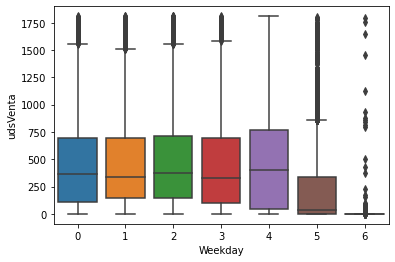

In [87]:
#Ahora ya se muestra mejor
sns.boxplot(x="Weekday", y="udsVenta", data=dataset)

### Outliers Precio

In [88]:
Q1_precios=dataset['Precio'].quantile(0.25)
Q3_precios=dataset['Precio'].quantile(0.75)
IQR_precios=Q3_precios-Q1_precios

Limit_lower_precios=Q1_precios-(1.5*IQR_precios)
Limit_upper_precios=Q3_precios+(1.5*IQR_precios)

In [89]:
#Mostramos outliers
dataset[((dataset["Precio"] < Limit_lower_precios) |(dataset["Precio"] > Limit_upper_precios))]

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
7936,2020-01-30,17,1704,641,0,6.2127,0,0,2020-01-30,2020,1,3
7938,2020-02-01,17,1026,360,0,6.2127,0,1,2020-02-01,2020,2,5
7939,2020-02-02,17,0,1918,0,6.2127,0,1,2020-02-02,2020,2,6
7940,2020-02-03,17,1579,380,0,6.2127,0,0,2020-02-03,2020,2,0
7941,2020-02-04,17,1204,1918,0,6.2127,0,0,2020-02-04,2020,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40536,2020-06-22,98,344,259,1,2.2610,0,0,2020-06-22,2020,6,0
40537,2020-06-23,98,194,269,1,2.2610,0,0,2020-06-23,2020,6,1
40538,2020-06-24,98,149,297,1,2.2610,0,0,2020-06-24,2020,6,2
40539,2020-06-25,98,192,307,1,2.2610,0,0,2020-06-25,2020,6,3


In [90]:
#Eliminamos outliers
dataset[~((dataset["Precio"] < Limit_lower_precios) |(dataset["Precio"] > Limit_upper_precios))]

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
3,2019-06-08,1,0,4918,0,4.19310,0,1,2019-06-08,2019,6,5
4,2019-06-09,1,0,4918,0,4.19310,0,1,2019-06-09,2019,6,6
6,2019-06-11,1,1037,1627,0,4.19310,0,0,2019-06-11,2019,6,1
7,2019-06-12,1,1382,3751,0,4.19310,0,0,2019-06-12,2019,6,2
10,2019-06-15,1,691,7484,0,4.19310,0,1,2019-06-15,2019,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
41300,2021-03-05,99,0,346,0,4.35323,0,0,2021-03-05,2021,3,4
41301,2021-03-06,99,0,346,0,4.35323,0,1,2021-03-06,2021,3,5
41302,2021-03-07,99,0,346,0,4.35323,0,1,2021-03-07,2021,3,6
41303,2021-03-08,99,0,346,0,4.35323,0,0,2021-03-08,2021,3,0


In [91]:
dataset=dataset[~((dataset["Precio"] < Limit_lower_precios) |(dataset["Precio"] > Limit_upper_precios))]

<AxesSubplot:xlabel='Weekday', ylabel='Precio'>

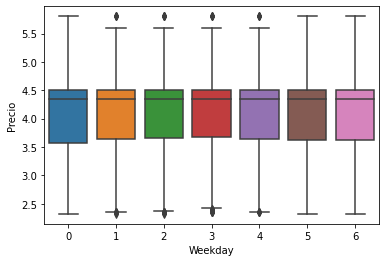

In [92]:
#Ahora ya se muestra mejor
sns.boxplot(x="Weekday", y="Precio", data=dataset)

### Outliers Stock

In [93]:
Q1_stock=dataset['udsStock'].quantile(0.25)
Q3_stock=dataset['udsStock'].quantile(0.75)
IQR_stock=Q3_stock-Q1_stock

Limit_lower_stock=Q1_stock-(1.5*IQR_stock)
Limit_upper_stock=Q3_stock+(1.5*IQR_stock)

In [94]:
#Mostramos outliers
dataset[((dataset["udsStock"] < Limit_lower_stock) |(dataset["udsStock"] > Limit_upper_stock))]

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
3,2019-06-08,1,0,4918,0,4.19310,0,1,2019-06-08,2019,6,5
4,2019-06-09,1,0,4918,0,4.19310,0,1,2019-06-09,2019,6,6
7,2019-06-12,1,1382,3751,0,4.19310,0,0,2019-06-12,2019,6,2
10,2019-06-15,1,691,7484,0,4.19310,0,1,2019-06-15,2019,6,5
13,2019-06-18,1,691,2815,0,4.19310,0,0,2019-06-18,2019,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34491,2021-02-26,81,0,2608,0,4.35323,0,0,2021-02-26,2021,2,4
34492,2021-02-27,81,0,2608,0,4.35323,0,1,2021-02-27,2021,2,5
34493,2021-02-28,81,0,2608,0,4.35323,0,1,2021-02-28,2021,2,6
34494,2021-03-01,81,0,2608,0,4.35323,0,0,2021-03-01,2021,3,0


In [95]:
#Eliminamos outliers
dataset[~((dataset["udsStock"] < Limit_lower_stock) |(dataset["udsStock"] > Limit_upper_stock))]

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
6,2019-06-11,1,1037,1627,0,4.19310,0,0,2019-06-11,2019,6,1
11,2019-06-16,1,0,227,0,4.19310,0,1,2019-06-16,2019,6,6
14,2019-06-19,1,1382,1433,0,4.19310,0,0,2019-06-19,2019,6,2
46,2019-07-21,1,0,1141,0,4.19310,0,1,2019-07-21,2019,7,6
53,2019-07-28,1,0,961,0,4.19310,0,1,2019-07-28,2019,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
41300,2021-03-05,99,0,346,0,4.35323,0,0,2021-03-05,2021,3,4
41301,2021-03-06,99,0,346,0,4.35323,0,1,2021-03-06,2021,3,5
41302,2021-03-07,99,0,346,0,4.35323,0,1,2021-03-07,2021,3,6
41303,2021-03-08,99,0,346,0,4.35323,0,0,2021-03-08,2021,3,0


In [96]:
dataset=dataset[~((dataset["udsStock"] < Limit_lower_stock) |(dataset["udsStock"] > Limit_upper_stock))]

<AxesSubplot:xlabel='Weekday', ylabel='udsStock'>

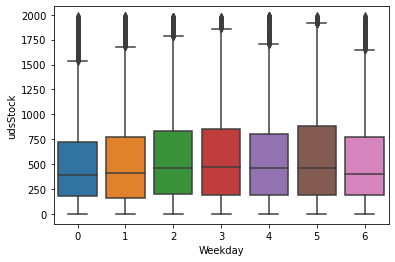

In [97]:
#Ahora ya se muestra mejor
sns.boxplot(x="Weekday", y="udsStock", data=dataset)

In [98]:
dataset

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
6,2019-06-11,1,1037,1627,0,4.19310,0,0,2019-06-11,2019,6,1
11,2019-06-16,1,0,227,0,4.19310,0,1,2019-06-16,2019,6,6
14,2019-06-19,1,1382,1433,0,4.19310,0,0,2019-06-19,2019,6,2
46,2019-07-21,1,0,1141,0,4.19310,0,1,2019-07-21,2019,7,6
53,2019-07-28,1,0,961,0,4.19310,0,1,2019-07-28,2019,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
41300,2021-03-05,99,0,346,0,4.35323,0,0,2021-03-05,2021,3,4
41301,2021-03-06,99,0,346,0,4.35323,0,1,2021-03-06,2021,3,5
41302,2021-03-07,99,0,346,0,4.35323,0,1,2021-03-07,2021,3,6
41303,2021-03-08,99,0,346,0,4.35323,0,0,2021-03-08,2021,3,0


## Comprovamos la estacionalidad 

Utilizamos el metodo de Dickey-Fullers test

Necesario para poder aplicar ARIMA

In [139]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

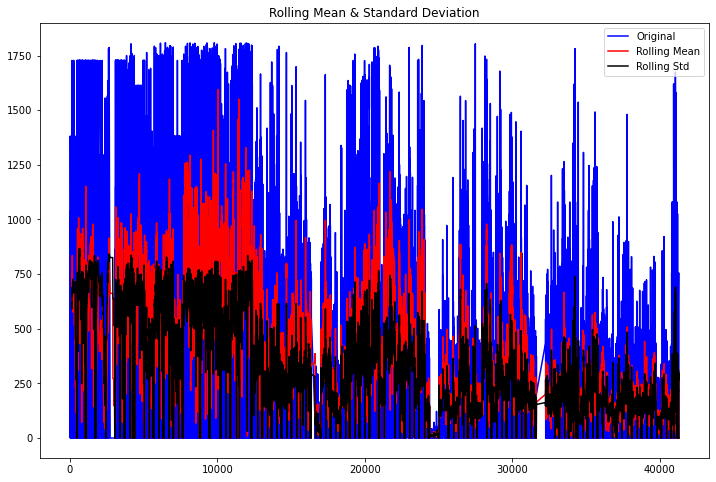

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                   -19.240312
p-value                            0.000000
#Lags Used                        20.000000
Number of Observations Used    33473.000000
Critical Value (1%)               -3.430545
Critical Value (5%)               -2.861626
Critical Value (10%)              -2.566816
dtype: float64


In [140]:
test_stationarity(dataset['udsVenta'])

In [141]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(dataset['udsVenta'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:5.43650851109978e-20


In [143]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(dataset['udsVenta'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:0.0


In [145]:
from statsmodels.tsa.stattools import adfuller
series = dataset['udsVenta']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -9.425835
p-value: 0.000000


Despues de probarlo de varias manera en todas obtenemos un p-value <= 0.05, por este motivo rechazamos la hipotesis nula en que los datos son estacionarios.

In [148]:
dataset

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
6,2019-06-11,1,1037,1627,0,4.19310,0,0,2019-06-11,2019,6,1
11,2019-06-16,1,0,227,0,4.19310,0,1,2019-06-16,2019,6,6
14,2019-06-19,1,1382,1433,0,4.19310,0,0,2019-06-19,2019,6,2
46,2019-07-21,1,0,1141,0,4.19310,0,1,2019-07-21,2019,7,6
53,2019-07-28,1,0,961,0,4.19310,0,1,2019-07-28,2019,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
41300,2021-03-05,99,0,346,0,4.35323,0,0,2021-03-05,2021,3,4
41301,2021-03-06,99,0,346,0,4.35323,0,1,2021-03-06,2021,3,5
41302,2021-03-07,99,0,346,0,4.35323,0,1,2021-03-07,2021,3,6
41303,2021-03-08,99,0,346,0,4.35323,0,0,2021-03-08,2021,3,0


In [44]:
dataset=dataset.drop(columns='Fecha_2')
dataset=dataset.set_index('Fecha')

In [101]:
dataset

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Fecha_2,Año,Mes,Weekday
6,2019-06-11,1,1037,1627,0,4.19310,0,0,2019-06-11,2019,6,1
11,2019-06-16,1,0,227,0,4.19310,0,1,2019-06-16,2019,6,6
14,2019-06-19,1,1382,1433,0,4.19310,0,0,2019-06-19,2019,6,2
46,2019-07-21,1,0,1141,0,4.19310,0,1,2019-07-21,2019,7,6
53,2019-07-28,1,0,961,0,4.19310,0,1,2019-07-28,2019,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...
41300,2021-03-05,99,0,346,0,4.35323,0,0,2021-03-05,2021,3,4
41301,2021-03-06,99,0,346,0,4.35323,0,1,2021-03-06,2021,3,5
41302,2021-03-07,99,0,346,0,4.35323,0,1,2021-03-07,2021,3,6
41303,2021-03-08,99,0,346,0,4.35323,0,0,2021-03-08,2021,3,0


Debido a que hemos visto que los datos eran estacionarios, dentro de los modelos dentro de ARIMA, seleccionaremos SARIMA y SARIMAX que son lo indicados en caso que los datos presenten estacionalidad. Para seleccionar los mejores parametros utilizaremos auto_arima, pero si leemos la documentación de esta función hemos de tener en cuenta que puede mostrar resultados infinitos y marcarlos como los mejores. Esta afirmación no es correcta aunque el plot nos lo muestre así, hemos de seleccionar el AIC más bajo posible.

In [ ]:
Utilizamos auto_arima con SARIMA

In [46]:

import pmdarima as pm

model = pm.auto_arima(dataset['udsVenta'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=3,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=30.05 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=513409.976, Time=0.53 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=501241.471, Time=10.44 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=491508.677, Time=27.05 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=513407.976, Time=0.29 sec
 ARIMA(0,0,1)(0,1,0)[3] intercept   : AIC=512235.736, Time=5.83 sec
 ARIMA(0,0,1)(1,1,1)[3] intercept   : AIC=491466.878, Time=26.49 sec
 ARIMA(0,0,1)(1,1,0)[3] intercept   : AIC=501202.698, Time=8.48 sec
 ARIMA(0,0,1)(2,1,1)[3] intercept   : AIC=inf, Time=26.50 sec
 ARIMA(0,0,1)(1,1,2)[3] intercept   : AIC=inf, Time=46.74 sec
 ARIMA(0,0,1)(0,1,2)[3] intercept   : AIC=491473.618, Time=33.25 sec
 ARIMA(0,0,1)(2,1,0)[3] intercept   : AIC=498988.365, Time=12.91 sec
 ARIMA(0,0,1)(2,1,2)[3] intercept   : AIC=inf, Time=56.01 sec
 ARIMA(0,0,0)(1,1,1)[3] intercept   : AIC=493137.281, Time=28.51 sec
 ARIMA(1,0,1)(1,1,1)[3]

In [67]:
train=dataset['udsVenta'][:'2020-06-01']
test=dataset['udsVenta']['2020-06-02':]


In [65]:
test

Fecha
2020-06-07       0
2020-06-21       0
2020-06-28       0
2020-07-05       0
2020-07-21    1382
              ... 
2021-03-05       0
2021-03-06       0
2021-03-07       0
2021-03-08       0
2021-03-09       0
Name: udsVenta, Length: 14354, dtype: int64

In [53]:
resDiff = sm.tsa.arma_order_select_ic(train, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

C:\Users\subir\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\subir\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

ARMA(p,q) = (7, 7) is the best.


In [63]:
model_sarima = sm.tsa.statespace.SARIMAX(train, trend='n', order=(7,1,0)).fit()
print(model_sarima.summary())

C:\Users\subir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\subir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ValueError: SARIMAX models require univariate `endog`. Got shape (33494, 10).

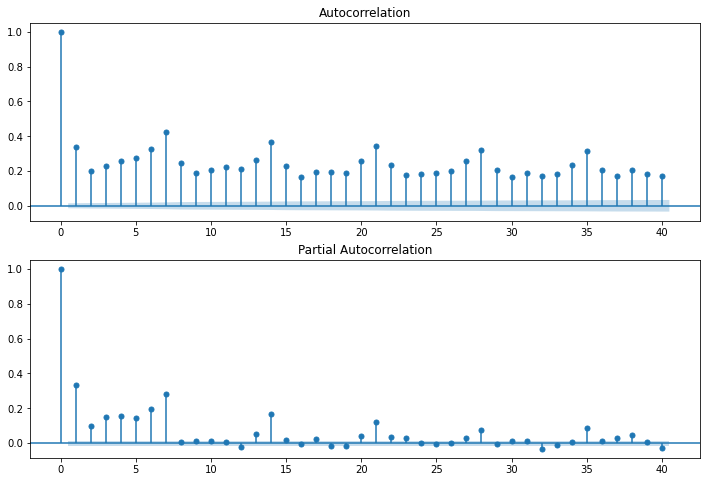

In [60]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=40, ax=ax2)# , lags=40

In [64]:
model_sarima = sm.tsa.statespace.SARIMAX(train, order=(1,1,1), seasonal_order=(1,0,0,7),enforce_stationarity=False,enforce_invertibility=False)
model_fit=model_sarima.fit(disp=False)

C:\Users\subir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\subir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\subir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\subir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

C:\Users\subir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


TypeError: '<' not supported between instances of 'int' and 'Timestamp'

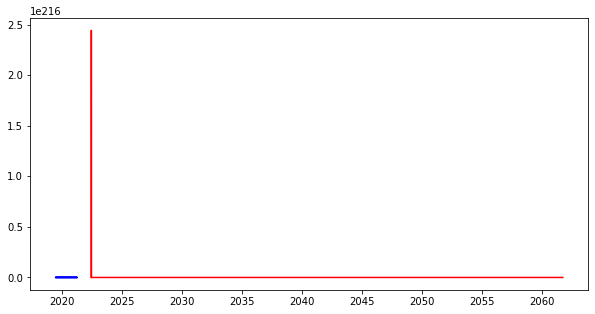

In [66]:
K=len(test)
forecast=model_fit.forecast(K)
forecast=np.exp(forecast)

series=dataset['udsVenta']
split_point=round(len(series)*0.5)

plt.figure(figsize=(10,5))
plt.plot(forecast,'r')
plt.plot(series,'b')
plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-test)**2)/len(test)))
plt.xlabel("Fecha")
plt.ylabel("udsVenta")
plt.autoscale(enable=True,axis='x',tight=True)
plt.axvline(x=series.index[split_point],color='black')

In [68]:
train.head()

Fecha
2019-06-11    1037
2019-06-16       0
2019-06-19    1382
2019-07-21       0
2019-07-28       0
Name: udsVenta, dtype: int64

In [69]:
dataset

,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Año,Mes,Weekday
Fecha,,,,,,,,,,
2019-06-11,1,1037,1627,0,4.19310,0,0,2019,6,1
2019-06-16,1,0,227,0,4.19310,0,1,2019,6,6
2019-06-19,1,1382,1433,0,4.19310,0,0,2019,6,2
2019-07-21,1,0,1141,0,4.19310,0,1,2019,7,6
2019-07-28,1,0,961,0,4.19310,0,1,2019,7,6
...,...,...,...,...,...,...,...,...,...,...
2021-03-05,99,0,346,0,4.35323,0,0,2021,3,4
2021-03-06,99,0,346,0,4.35323,0,1,2021,3,5
2021-03-07,99,0,346,0,4.35323,0,1,2021,3,6


In [103]:
dataset=dataset.drop(columns='Fecha_2')


In [106]:
dataset_xgboost=dataset
dataset_xgboost

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Año,Mes,Weekday
6,2019-06-11,1,1037,1627,0,4.19310,0,0,2019,6,1
11,2019-06-16,1,0,227,0,4.19310,0,1,2019,6,6
14,2019-06-19,1,1382,1433,0,4.19310,0,0,2019,6,2
46,2019-07-21,1,0,1141,0,4.19310,0,1,2019,7,6
53,2019-07-28,1,0,961,0,4.19310,0,1,2019,7,6
...,...,...,...,...,...,...,...,...,...,...,...
41300,2021-03-05,99,0,346,0,4.35323,0,0,2021,3,4
41301,2021-03-06,99,0,346,0,4.35323,0,1,2021,3,5
41302,2021-03-07,99,0,346,0,4.35323,0,1,2021,3,6
41303,2021-03-08,99,0,346,0,4.35323,0,0,2021,3,0


In [107]:
dataset_xgboost=dataset_xgboost.set_index(dataset_xgboost['Fecha'])
dataset_xgboost=dataset_xgboost.sort_index()

In [108]:
train_xgboost=dataset_xgboost['2019-07-01':'2020-06-01']
test_xgboost=dataset_xgboost['2020-06-02':]

print('Train Dataset:',train_xgboost.shape)
print('Test Dataset:',test_xgboost.shape)

Train Dataset: (17767, 11)
Test Dataset: (14354, 11)


In [109]:
train_xgboost.corr()

,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Año,Mes,Weekday
Producto,1.000000,-0.362436,-0.573537,-0.067116,0.115049,-0.013103,-0.040230,0.015183,-0.009040,-0.014477
udsVenta,-0.362436,1.000000,0.321709,0.145292,-0.109008,-0.128107,-0.417026,0.008042,-0.009280,-0.333502
udsStock,-0.573537,0.321709,1.000000,0.186299,-0.213349,0.013770,0.014375,0.005699,-0.002512,0.025535
flag,-0.067116,0.145292,0.186299,1.000000,-0.671949,-0.000272,-0.009547,-0.011907,-0.001956,-0.012529
Precio,0.115049,-0.109008,-0.213349,-0.671949,1.000000,-0.003654,-0.003024,-0.015357,0.017786,0.004950
Festivo,-0.013103,-0.128107,0.013770,-0.000272,-0.003654,1.000000,-0.050093,0.016754,0.024548,0.032353
Fin de semana,-0.040230,-0.417026,0.014375,-0.009547,-0.003024,-0.050093,1.000000,0.006576,0.000927,0.801764
Año,0.015183,0.008042,0.005699,-0.011907,-0.015357,0.016754,0.006576,1.000000,-0.896040,0.011040
Mes,-0.009040,-0.009280,-0.002512,-0.001956,0.017786,0.024548,0.000927,-0.896040,1.000000,-0.005017
Weekday,-0.014477,-0.333502,0.025535,-0.012529,0.004950,0.032353,0.801764,0.011040,-0.005017,1.000000


In [110]:
train_xgboost

,Fecha,Producto,udsVenta,udsStock,flag,Precio,Festivo,Fin de semana,Año,Mes,Weekday
Fecha,,,,,,,,,,,
2019-07-01,2019-07-01,98,238,192,0,3.53160,0,0,2019,7,0
2019-07-01,2019-07-01,58,16,33,0,4.35323,0,0,2019,7,0
2019-07-01,2019-07-01,35,605,310,0,4.77000,0,0,2019,7,0
2019-07-01,2019-07-01,69,432,22,1,4.35323,0,0,2019,7,0
2019-07-01,2019-07-01,24,1721,801,0,4.77000,0,0,2019,7,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,2020-06-01,80,0,339,0,4.35323,0,0,2020,6,0
2020-06-01,2020-06-01,66,245,328,0,5.03100,0,0,2020,6,0
2020-06-01,2020-06-01,67,579,449,0,4.63500,0,0,2020,6,0


In [ ]:
X_train_xgboost=train_xgboost[['']]